First 5 rows of the DataFrame:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CH

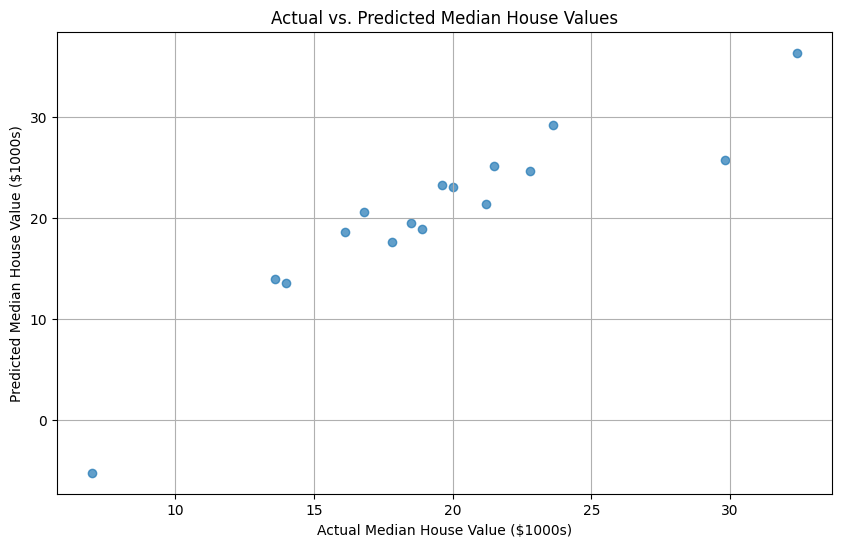

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

data_rows = []
file_path = 'boston.csv'

with open(file_path, 'r') as f:
    for _ in range(22):
        next(f)

    while True:
        line1 = f.readline()
        if not line1:
            break
        line2 = f.readline()
        if not line2:
            break

        combined_line = (line1.strip() + ' ' + line2.strip()).replace('  ', ' ')

        try:
            row_values = [float(x) for x in combined_line.split()]
            if len(row_values) == len(column_names):
                data_rows.append(row_values)
            else:
                print(f"Skipping malformed row (incorrect number of values): {combined_line}")
        except ValueError as e:
            print(f"Skipping row due to ValueError: {e} - Line: {combined_line}")

df = pd.DataFrame(data_rows, columns=column_names)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
print(df.info())

print("\nBasic Statistics of the DataFrame:")
print(df.describe())

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression Model Training Complete.")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Median House Value ($1000s)")
plt.ylabel("Predicted Median House Value ($1000s)")
plt.title("Actual vs. Predicted Median House Values")
plt.grid(True)
plt.show()